# DATACAMP

# Statistical Thinking in Python (Part 2)

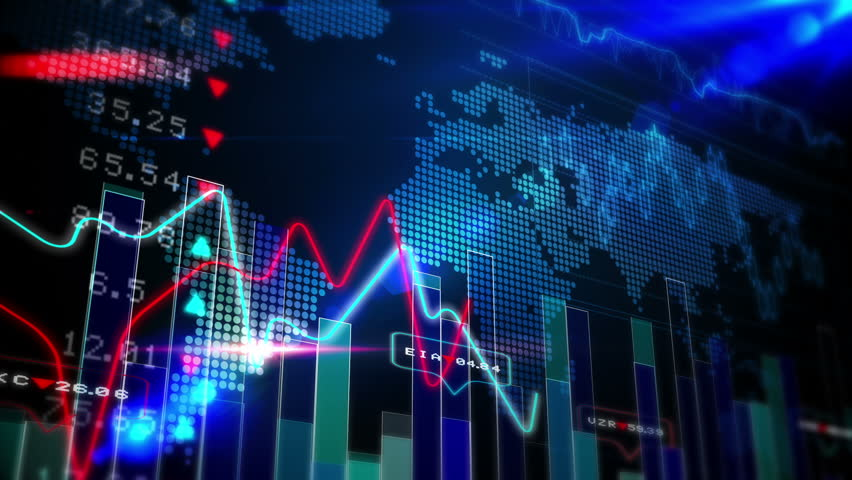

In [1]:
from IPython.display import Image
Image('statistics2.jpg')

# Course Description
After completing Statistical Thinking in Python (Part 1), you have the probabilistic mindset and foundational hacker stats skills to dive into data sets and extract useful information from them. In this course, you will do just that, expanding and honing your hacker stats toolbox to perform the two key tasks in statistical inference, parameter estimation and hypothesis testing. You will work with real data sets as you learn, culminating with analysis of measurements of the beaks of the Darwin's famous finches. You will emerge from this course with new knowledge and lots of practice under your belt, ready to attack your own inference problems out in the world.

# 1. Parameter estimation by optimization
When doing statistical inference, we speak the language of probability. A probability distribution that describes your data has parameters. So, a major goal of statistical inference is to estimate the values of these parameters, which allows us to concisely and unambiguously describe our data and draw conclusions from it. In this chapter, you will learn how to find the optimal parameters, those that best describe your data.

In [2]:
# How often do we get no-hitters?
# The number of games played between each no-hitter in the modern era (1901-2015) 
# of Major League Baseball is stored in the array nohitter_times.
# 
# If you assume that no-hitters are described as a Poisson process,
# then the time between no-hitters is Exponentially distributed. As you have seen, 
# the Exponential distribution has a single parameter, which we will call τ, the typical interval time. 
# The value of the parameter τ that makes the exponential distribution best match the data is 
# the mean interval time (where time is in units of number of games) between no-hitters.
# 
# Compute the value of this parameter from the data. Then, use np.random.exponential() 
# to "repeat" the history of Major League Baseball by drawing inter-no-hitter times from 
# an exponential distribution with the τ you found and plot the histogram as an approximation to the PDF.
# 
# NumPy, pandas, matlotlib.pyplot, and seaborn have been imported for you as np, pd, plt, and sns, respectively.
# 
# Instructions
# 
# Seed the random number generator with 42.
# Compute the mean time (in units of number of games) between no-hitters.
# Draw 100,000 samples from an Exponential distribution with the parameter you computed from the mean of 
# the inter-no-hitter times.
# Plot the theoretical PDF using plt.hist(). Remember to use keyword arguments bins=50, normed=True, 
# and histtype='step'. Be sure to label your axes.

In [16]:
url = 'https://assets.datacamp.com/production/repositories/470/datasets/593c37a3588980e321b126e30873597620ca50b7/mlb_nohitters.csv'
import pandas as pd
df = pd.read_csv(url)
df['date']=pd.to_datetime(df['date'], format='%Y%m%d')    
df.set_index('date', inplace=True, drop=True)
df = df.loc['1901':'2015',:]

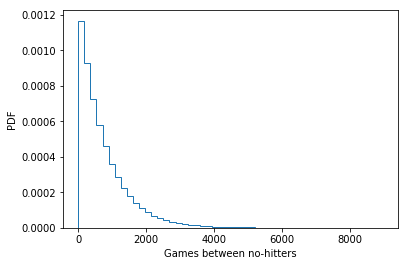

In [18]:
import numpy as np
import matplotlib.pyplot as plt

nohitter_times = np.array([843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467])

# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50, normed=True, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [ ]:
# Do the data follow our story?
# You have modeled no-hitters using an Exponential distribution. Create an ECDF of the real data.
# Overlay the theoretical CDF with the ECDF from the data. This helps you to verify that the Exponential
# distribution describes the observed data.
# It may be helpful to remind yourself of the function you created in the previous course to compute the
# ECDF, as well as the code you wrote to plot it.

# INSTRUCTIONS
# 
# -Compute an ECDF from the actual time between no-hitters (nohitter_times). Use the ecdf() function you 
# wrote in the prequel course.
# -Create a CDF from the theoretical samples you took in the last exercise (inter_nohitter_time).
# -Plot x_theor and y_theor as a line using plt.plot(). Then overlay the ECDF of the real data x and y 
# as points. To do this, you have to specify the keyword arguments marker = '.' and linestyle = 'none' 
# in addition to x and y inside plt.plot().
# -Set a 2% margin on the plot.
# -Show the plot.

In [20]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

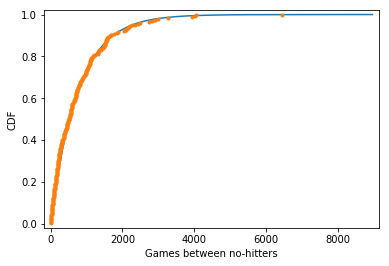

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

In [22]:
# How is this parameter optimal?
# Now sample out of an exponential distribution with τ being twice as large as the optimal τ.
# Do it again for half as large. Make CDFs of these samples and overlay them with your data. You can see 
# that they do not reproduce the data as well. Thus, the τ you computed from the mean inter-no-hitter 
# times is optimal in that it best reproduces the data.
# Note: In this and all subsequent exercises, the random number generator is pre-seeded for you to save 
# you some typing.
# INSTRUCTIONS
# 100XP
# -Take 10000 samples out of an Exponential distribution with parameter τ1/2 = tau/2.
# -Take 10000 samples out of an Exponential distribution with parameter τ2 = 2*tau.
# -Generate CDFs from these two sets of samples using your ecdf() function.
# -Add these two CDFs as lines to your plot. This has been done for you, so hit 'Submit Answer' to view the plot!

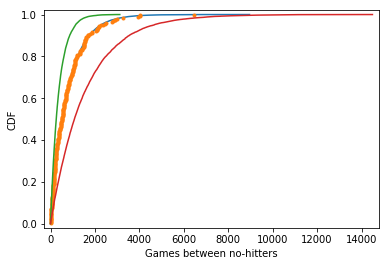

In [23]:
tau = 763.03585657370513

nohitter_times = np.array([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467])

inter_nohitter_time = np.array([  358.068379  ,  2296.83058443,  1004.72417816, ...,  2237.19630117,
         386.59034972,   186.79263858])

# Seed random number generator
np.random.seed(42)

# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2,10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(tau*2,10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

In [24]:
# EDA of literacy/fertility data
# In the next few exercises, we will look at the correlation between female literacy and fertility
# (defined as the average number of children born per woman) throughout the world. For ease of analysis
# and interpretation, we will work with the illiteracy rate.
# It is always a good idea to do some EDA ahead of our analysis. To this end, plot the fertility versus
# illiteracy and compute the Pearson correlation coefficient. The Numpy array illiteracy has the illiteracy
# rate among females for most of the world's nations. The array fertility has the corresponding fertility data.
# Here, it may be useful to refer back to the function you wrote in the previous course to compute the
# Pearson correlation coefficient.
# 
# INSTRUCTIONS

# Plot fertility (y-axis) versus illiteracy (x-axis) as a scatter plot.
# Set a 2% margin.
# Compute and print the Pearson correlation coefficient between illiteracy and fertility.

In [26]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0, 1]

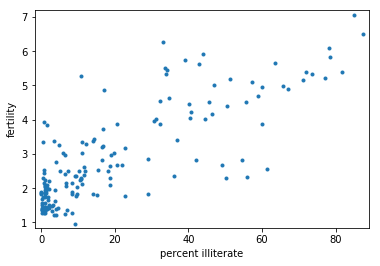

0.8041324026815346


In [27]:
import numpy as np
import matplotlib.pyplot as plt

fertility = np.array([ 1.769,  2.682,  2.077,  2.132,  1.827,  3.872,  2.288,  5.173,
        1.393,  1.262,  2.156,  3.026,  2.033,  1.324,  2.816,  5.211,
        2.1  ,  1.781,  1.822,  5.908,  1.881,  1.852,  1.39 ,  2.281,
        2.505,  1.224,  1.361,  1.468,  2.404,  5.52 ,  4.058,  2.223,
        4.859,  1.267,  2.342,  1.579,  6.254,  2.334,  3.961,  6.505,
        2.53 ,  2.823,  2.498,  2.248,  2.508,  3.04 ,  1.854,  4.22 ,
        5.1  ,  4.967,  1.325,  4.514,  3.173,  2.308,  4.62 ,  4.541,
        5.637,  1.926,  1.747,  2.294,  5.841,  5.455,  7.069,  2.859,
        4.018,  2.513,  5.405,  5.737,  3.363,  4.89 ,  1.385,  1.505,
        6.081,  1.784,  1.378,  1.45 ,  1.841,  1.37 ,  2.612,  5.329,
        5.33 ,  3.371,  1.281,  1.871,  2.153,  5.378,  4.45 ,  1.46 ,
        1.436,  1.612,  3.19 ,  2.752,  3.35 ,  4.01 ,  4.166,  2.642,
        2.977,  3.415,  2.295,  3.019,  2.683,  5.165,  1.849,  1.836,
        2.518,  2.43 ,  4.528,  1.263,  1.885,  1.943,  1.899,  1.442,
        1.953,  4.697,  1.582,  2.025,  1.841,  5.011,  1.212,  1.502,
        2.516,  1.367,  2.089,  4.388,  1.854,  1.748,  2.978,  2.152,
        2.362,  1.988,  1.426,  3.29 ,  3.264,  1.436,  1.393,  2.822,
        4.969,  5.659,  3.24 ,  1.693,  1.647,  2.36 ,  1.792,  3.45 ,
        1.516,  2.233,  2.563,  5.283,  3.885,  0.966,  2.373,  2.663,
        1.251,  2.052,  3.371,  2.093,  2.   ,  3.883,  3.852,  3.718,
        1.732,  3.928])

illiteracy = np.array([  9.5,  49.2,   1. ,  11.2,   9.8,  60. ,  50.2,  51.2,   0.6,
         1. ,   8.5,   6.1,   9.8,   1. ,  42.2,  77.2,  18.7,  22.8,
         8.5,  43.9,   1. ,   1. ,   1.5,  10.8,  11.9,   3.4,   0.4,
         3.1,   6.6,  33.7,  40.4,   2.3,  17.2,   0.7,  36.1,   1. ,
        33.2,  55.9,  30.8,  87.4,  15.4,  54.6,   5.1,   1.1,  10.2,
        19.8,   0. ,  40.7,  57.2,  59.9,   3.1,  55.7,  22.8,  10.9,
        34.7,  32.2,  43. ,   1.3,   1. ,   0.5,  78.4,  34.2,  84.9,
        29.1,  31.3,  18.3,  81.8,  39. ,  11.2,  67. ,   4.1,   0.2,
        78.1,   1. ,   7.1,   1. ,  29. ,   1.1,  11.7,  73.6,  33.9,
        14. ,   0.3,   1. ,   0.8,  71.9,  40.1,   1. ,   2.1,   3.8,
        16.5,   4.1,   0.5,  44.4,  46.3,  18.7,   6.5,  36.8,  18.6,
        11.1,  22.1,  71.1,   1. ,   0. ,   0.9,   0.7,  45.5,   8.4,
         0. ,   3.8,   8.5,   2. ,   1. ,  58.9,   0.3,   1. ,  14. ,
        47. ,   4.1,   2.2,   7.2,   0.3,   1.5,  50.5,   1.3,   0.6,
        19.1,   6.9,   9.2,   2.2,   0.2,  12.3,   4.9,   4.6,   0.3,
        16.5,  65.7,  63.5,  16.8,   0.2,   1.8,   9.6,  15.2,  14.4,
         3.3,  10.6,  61.3,  10.9,  32.2,   9.3,  11.6,  20.7,   6.5,
         6.7,   3.5,   1. ,   1.6,  20.5,   1.5,  16.7,   2. ,   0.9])

# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))

In [28]:
# Linear regression
# 
# We will assume that fertility is a linear function of the female illiteracy rate. That is, f=ai+b, where 
# a is the slope and b is the intercept. We can think of the intercept as the minimal fertility rate,
# probably somewhere between one and two. The slope tells us how the fertility rate varies with illiteracy.
# We can find the best fit line using np.polyfit().
# Plot the data and the best fit line. Print out the slope and intercept. (Think: what are their units?)
# 
# INSTRUCTIONS
# 
# -Compute the slope and intercept of the regression line using np.polyfit(). Remember, 
# fertility is on the y-axis and illiteracy on the x-axis.
# -Print out the slope and intercept from the linear regression.
# -To plot the best fit line, create an array x that consists of 0 and 100 using np.array(). 
# Then, compute the theoretical values of y based on your regression parameters. I.e., y = a * x + b.
# -Plot the data and the regression line on the same plot. Be sure to label your axes.
# -Hit 'Submit Answer' to display your plot.

slope = 0.04979854809063423 children per woman / percent illiterate
intercept = 1.8880506106365562 children per woman


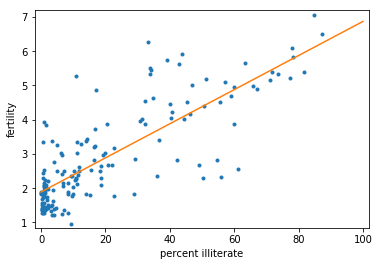

In [29]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

In [30]:
# How is it optimal?
# 
# The function np.polyfit() that you used to get your regression parameters finds the optimal slope and
# intercept. It is optimizing the sum of the squares of the residuals, also known as RSS (for residual
# sum of squares). In this exercise, you will plot the function that is being optimized, the RSS, versus
# the slope parameter a. To do this, fix the intercept to be what you found in the optimization. Then,
# plot the RSS vs. the slope. Where is it minimal?
# 
# INSTRUCTIONS
# 
# -Specify the values of the slope for which to compute the RSS. Use np.linspace() to get 200 points
# in the range between 0 and 0.1. For example, to get 100 points in the range between 0 and 0.5, you
# could use np.linspace() like so: np.linspace(0, 0.5, 100).
# -Initialize an array, rss, to contain the RSS using np.empty_like() and the array you created above.
# The empty_like() function returns a new array with the same shape and type as a given array 
# (in this case, a_vals).
# -Write a for loop to compute the sum of RSS of the slope. Hint: the RSS is given by 
# np.sum((y_data - a * x_data - b)**2). The variable b you computed in the last exercise is already in 
# your namespace. Here, fertility is the y_data and illiteracy the x_data.
# -Plot the RSS (rss) versus slope (a_vals).
# Hit 'Submit Answer' to see the plot!

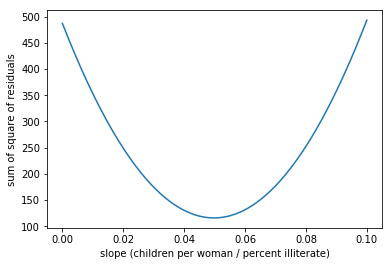

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

In [32]:
# Linear regression on appropriate Anscombe data
# 
# For practice, perform a linear regression on the data set from Anscombe's quartet that is most reasonably 
# interpreted with linear regression.
# 
# INSTRUCTIONS
# 
# -Compute the parameters for the slope and intercept using np.polyfit(). The Anscombe data are stored 
# in the arrays x and y.
# -Print the slope a and intercept b.
# -Generate theoretical x and y data from the linear regression. Your x array, which you can create with 
# np.array(), should consist of 3 and 15. To generate the y data, multiply the slope by x_theor and add 
# the intercept.
# -Plot the Anscombe data as a scatter plot and then plot the theoretical line. Remember to include the 
# marker='.' and linestyle='none' keyword arguments in addition to x and y when to plot the Anscombe data 
# as a scatter plot. You do not need these arguments when plotting the theoretical line.
# -Hit 'Submit Answer' to see the plot!

In [37]:
url = 'https://assets.datacamp.com/production/repositories/470/datasets/fe820c6cbe9bcf4060eeb9e31dd86aa04264153a/anscombe.csv'
ab = pd.read_csv(url)
ab

,0,0.1,1,1.1,2,2.1,3,3.1
0,x,y,x,y,x,y,x,y
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
5,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
6,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
7,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
8,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
9,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56


In [38]:
x, y = ab.iloc[1:, 0].astype(float), ab.iloc[1:, 1].astype(float)

0.5000909090909091 3.000090909090908


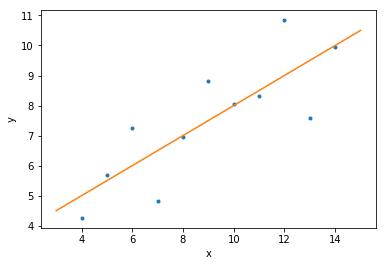

In [39]:
# Perform linear regression: a, b
a, b = np.polyfit(x, y, 1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

In [34]:
# Linear regression on all Anscombe data
# 
# Now, to verify that all four of the Anscombe data sets have the same slope and intercept from a 
# linear regression, you will compute the slope and intercept for each set. The data are stored in 
# lists; anscombe_x = [x1, x2, x3, x4] and anscombe_y = [y1, y2, y3, y4], where, for example, x2 and y2 
# are the x and y values for the second Anscombe data set.
# 
# Instructions
# 
# Write a for loop to do the following for each Anscombe data set.
# Compute the slope and intercept.
# Print the slope and intercept.

In [40]:
anscombe_x = [ab.iloc[1:, 0].astype(float), ab.iloc[1:, 2].astype(float), 
              ab.iloc[1:, 4].astype(float), ab.iloc[1:, 6].astype(float)]

anscombe_y = [ab.iloc[1:, 1].astype(float), ab.iloc[1:, 3].astype(float), 
              ab.iloc[1:, 5].astype(float), ab.iloc[1:, 7].astype(float)]

In [41]:
# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x, y, 1)

    # Print the result
    print('slope:', a, 'intercept:', b)

slope: 0.5000909090909091 intercept: 3.000090909090908
slope: 0.5 intercept: 3.0009090909090905
slope: 0.4997272727272729 intercept: 3.002454545454545
slope: 0.4999090909090908 intercept: 3.001727272727274


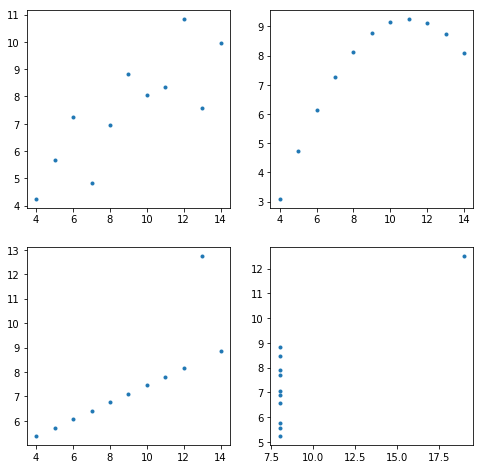

In [46]:
plt.figure(figsize=[8,8])

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.plot(anscombe_x[i], anscombe_y[i], marker='.', linestyle='None')

plt.show()

# 2. Bootstrap confidence intervals

To "pull yourself up by your bootstraps" is a classic idiom meaning that you achieve a difficult task by yourself with no help at all. In statistical inference, you want to know what would happen if you could repeat your data acquisition an infinite number of times. This task is impossible, but can we use only the data we actually have to get close to the same result as an infinitude of experiments? The answer is yes! The technique to do it is aptly called bootstrapping. This chapter will introduce you to this extraordinarily powerful tool.

In [42]:
# Visualizing bootstrap samples
# 
# In this exercise, you will generate bootstrap samples from the set of annual rainfall data measured at
# the Sheffield Weather Station in the UK from 1883 to 2015. The data are stored in the NumPy array
# rainfall in units of millimeters (mm). By graphically displaying the bootstrap samples with an ECDF,
# you can get a feel for how bootstrap sampling allows probabilistic descriptions of data.
# 
# INSTRUCTIONS
# 
# -Write a for loop to acquire 50 bootstrap samples of the rainfall data and plot their ECDF.
# -Use np.random.choice() to generate a bootstrap sample from the NumPy array rainfall. Be sure that
# the size of the resampled array is len(rainfall).
# -Use the function ecdf() that you wrote in the prequel to this course to generate the x and y values
# for the ECDF of the bootstrap sample bs_sample.
# -Plot the ECDF values. Specify color='gray' (to make gray dots) and alpha=0.1 (to make them
# semi-transparent, since we are overlaying so many) in addition to the marker='.' and linestyle='none'
# keyword arguments.
# -Use ecdf() to generate x and y values for the ECDF of the original rainfall data available in the
# array rainfall.
# -Plot the ECDF values of the original data.
# Hit 'Submit Answer' to visualize the samples!

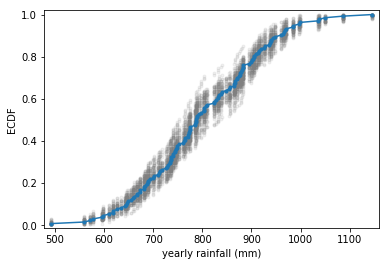

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

rainfall = np.array([   875.5,   648.2,   788.1,   940.3,   491.1,   743.5,   730.1,
                        686.5,   878.8,   865.6,   654.9,   831.5,   798.1,   681.8,
                        743.8,   689.1,   752.1,   837.2,   710.6,   749.2,   967.1,
                        701.2,   619. ,   747.6,   803.4,   645.6,   804.1,   787.4,
                        646.8,   997.1,   774. ,   734.5,   835. ,   840.7,   659.6,
                        828.3,   909.7,   856.9,   578.3,   904.2,   883.9,   740.1,
                        773.9,   741.4,   866.8,   871.1,   712.5,   919.2,   927.9,
                        809.4,   633.8,   626.8,   871.3,   774.3,   898.8,   789.6,
                        936.3,   765.4,   882.1,   681.1,   661.3,   847.9,   683.9,
                        985.7,   771.1,   736.6,   713.2,   774.5,   937.7,   694.5,
                        598.2,   983.8,   700.2,   901.3,   733.5,   964.4,   609.3,
                        1035.2,   718. ,   688.6,   736.8,   643.3,  1038.5,   969. ,
                        802.7,   876.6,   944.7,   786.6,   770.4,   808.6,   761.3,
                        774.2,   559.3,   674.2,   883.6,   823.9,   960.4,   877.8,
                        940.6,   831.8,   906.2,   866.5,   674.1,   998.1,   789.3,
                        915. ,   737.1,   763. ,   666.7,   824.5,   913.8,   905.1,
                        667.8,   747.4,   784.7,   925.4,   880.2,  1086.9,   764.4,
                        1050.1,   595.2,   855.2,   726.9,   785.2,   948.8,   970.6,
                        896. ,   618.4,   572.4,  1146.4,   728.2,   864.2,   793. ])

for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

In [44]:
# Generating many bootstrap replicates
# 
# The function bootstrap_replicate_1d() from the video is available in your namespace. Now you'll write
# another function, draw_bs_reps(data, func, size=1), which generates many bootstrap replicates from the
# data set. This function will come in handy for you again and again as you compute confidence intervals
# and later when you do hypothesis tests.
# For your reference, the bootstrap_replicate_1d() function is provided below:
# def bootstrap_replicate_1d(data, func):
#     return func(np.random.choice(data, size=len(data)))
# 
# INSTRUCTIONS
# 
# -Define a function with call signature draw_bs_reps(data, func, size=1).
# -Using np.empty(), initialize an array called bs_replicates of size size to hold all of the bootstrap
# replicates.
# -Write a for loop that ranges over size and computes a replicate using bootstrap_replicate_1d(). Refer
# to the exercise description above to see the function signature of bootstrap_replicate_1d(). Store the
# replicate in the appropriate index of bs_replicates.
# -Return the array of replicates bs_replicates. This has already been done for you.

In [45]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [47]:
# Bootstrap replicates of the mean and the SEM
# 
# In this exercise, you will compute a bootstrap estimate of the probability distribution function of the
# mean annual rainfall at the Sheffield Weather Station. Remember, we are estimating the mean annual rainfall 
# we would get if the Sheffield Weather Station could repeat all of the measurements from 1883 to 2015 over
# and over again. This is a probabilistic estimate of the mean. You will plot the PDF as a histogram, and 
# you will see that it is Normal.
# In fact, it can be shown theoretically that under not-too-restrictive conditions, the value of the 
# mean will always be Normally distributed. (This does not hold in general, just for the mean and a 
# few other statistics.) The standard deviation of this distribution, called the standard error of the 
# mean, or SEM, is given by the standard deviation of the data divided by the square root of the number 
# of data points. I.e., for a data set, sem = np.std(data) / np.sqrt(len(data)). Using hacker statistics,
# you get this same result without the need to derive it, but you will verify this result from your
# bootstrap replicates.
# The dataset has been pre-loaded for you into an array called rainfall.
# 
# INSTRUCTIONS
# 
# -Draw 10000 bootstrap replicates of the mean annual rainfall using your draw_bs_reps() function and the
# rainfall array. Hint: Pass in np.mean for func to compute the mean.
# -As a reminder, draw_bs_reps() accepts 3 arguments: data, func, and size.
# -Compute and print the standard error of the mean of rainfall.
# -The formula to compute this is np.std(data) / np.sqrt(len(data)).
# -Compute and print the standard deviation of your bootstrap replicates bs_replicates.
# -Make a histogram of the replicates using the normed=True keyword argument and 50 bins.
# -Hit 'Submit Answer' to see the plot!

In [52]:
def bootstrap_replicate_1d(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample) 

10.510549150506188
10.557438861532136


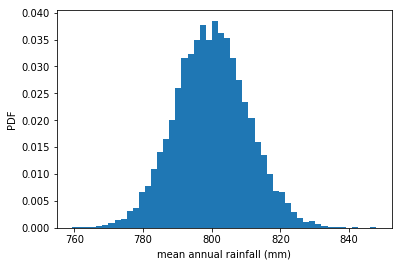

In [53]:
import matplotlib.pyplot as plt
import numpy as np


def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, size=10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [54]:
# Bootstrap replicates of other statistics
# 
# We saw in a previous exercise that the mean is Normally distributed. This does not necessarily hold for
# other statistics, but no worry: as hackers, we can always take bootstrap replicates! In this exercise,
# you'll generate bootstrap replicates for the variance of the annual rainfall at the Sheffield Weather
# Station and plot the histogram of the replicates.
# Here, you will make use of the draw_bs_reps() function you defined a few exercises ago. It is provided
# below for your reference:
# def draw_bs_reps(data, func, size=1):
#     return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])
# 
# INSTRUCTIONS
# 
# -Draw 10000 bootstrap replicates of the variance in annual rainfall using your draw_bs_reps() function.
# Hint: Pass in np.var for computing the variance.
# -Divide your variance replicates - bs_replicates - by 100 to put the variance in units of square
# centimeters for convenience.
# -Make a histogram of bs_replicates using the normed=True keyword argument and 50 bins.
# -Hit 'Submit Answer' to see the plot!

In [55]:
def draw_bs_reps(data, func, size=1):
    return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])


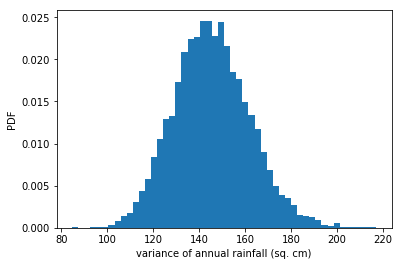

In [56]:
import numpy as np
import matplotlib.pyplot as plt

rainfall = np.array([  875.5,   648.2,   788.1,   940.3,   491.1,   743.5,   730.1,
         686.5,   878.8,   865.6,   654.9,   831.5,   798.1,   681.8,
         743.8,   689.1,   752.1,   837.2,   710.6,   749.2,   967.1,
         701.2,   619. ,   747.6,   803.4,   645.6,   804.1,   787.4,
         646.8,   997.1,   774. ,   734.5,   835. ,   840.7,   659.6,
         828.3,   909.7,   856.9,   578.3,   904.2,   883.9,   740.1,
         773.9,   741.4,   866.8,   871.1,   712.5,   919.2,   927.9,
         809.4,   633.8,   626.8,   871.3,   774.3,   898.8,   789.6,
         936.3,   765.4,   882.1,   681.1,   661.3,   847.9,   683.9,
         985.7,   771.1,   736.6,   713.2,   774.5,   937.7,   694.5,
         598.2,   983.8,   700.2,   901.3,   733.5,   964.4,   609.3,
        1035.2,   718. ,   688.6,   736.8,   643.3,  1038.5,   969. ,
         802.7,   876.6,   944.7,   786.6,   770.4,   808.6,   761.3,
         774.2,   559.3,   674.2,   883.6,   823.9,   960.4,   877.8,
         940.6,   831.8,   906.2,   866.5,   674.1,   998.1,   789.3,
         915. ,   737.1,   763. ,   666.7,   824.5,   913.8,   905.1,
         667.8,   747.4,   784.7,   925.4,   880.2,  1086.9,   764.4,
        1050.1,   595.2,   855.2,   726.9,   785.2,   948.8,   970.6,
         896. ,   618.4,   572.4,  1146.4,   728.2,   864.2,   793. ])

# Generate 10,000 bootstrap replicates of the variance: bs_replicates
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])

# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, size=10000)

# Put the variance in units of square centimeters
bs_replicates /= 100

# Make a histogram of the results
_ = plt.hist(bs_replicates, normed=True, bins=50)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [57]:
# Confidence interval on the rate of no-hitters
# 
# Consider again the inter-no-hitter intervals for the modern era of baseball. 
# Generate 10,000 bootstrap replicates of the optimal parameter τ. Plot a histogram of 
# your replicates and report a 95% confidence interval.
# 
# Instructions
# 
# Generate 10000 bootstrap replicates of τ from the nohitter_times data using your draw_bs_reps() function. 
# Recall that the optimal τ is calculated as the mean of the data.
# Compute the 95% confidence interval using np.percentile() and passing in two arguments: 
# The array bs_replicates, and the list of percentiles - in this case 2.5 and 97.5.
# Print the confidence interval.

95% confidence interval = [661.4061753  871.92968127] games


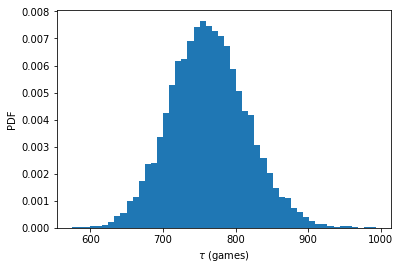

In [58]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, size=10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [59]:
# A function to do pairs bootstrap
# 
# As discussed in the video, pairs bootstrap involves resampling pairs of data. 
# Each collection of pairs fit with a line, in this case using np.polyfit(). 
# We do this again and again, getting bootstrap replicates of the parameter values. 
# To have a useful tool for doing pairs bootstrap, you will write a function 
# to perform pairs bootstrap on a set of x,y data.
# 
# Instructions
# 
# Define a function with call signature draw_bs_pairs_linreg(x, y, size=1) to perform pairs bootstrap 
# estimates on linear regression parameters.
# 
# Use np.arange() to set up an array of indices going from 0 to len(x). 
# These are what you will resample and use them to pick values out of the x and y arrays.
# 
# Use np.empty() to initialize the slope and intercept replicate arrays to be of size size.
# Write a for loop to:
# Resample the indices inds. Use np.random.choice() to do this.
# Make new x and y arrays bs_x and bs_y using the the resampled indices bs_inds. 
# To do this, slice x and y with bs_inds.
# 
# Use np.polyfit() on the new x and y arrays and store the computed slope and intercept.
# Return the pair bootstrap replicates of the slope and intercept.

In [60]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

In [61]:
# Pairs bootstrap of literacy/fertility data
# 
# Using the function you just wrote, perform pairs bootstrap to plot a histogram describing 
# the estimate of the slope from the illiteracy/fertility data. 
# Also report the 95% confidence interval of the slope. The data is available to you in 
# the NumPy arrays illiteracy and fertility.
# 
# As a reminder, draw_bs_pairs_linreg() has a function signature of draw_bs_pairs_linreg(x, y, size=1),
# and it returns two values: bs_slope_reps and bs_intercept_reps.
# 
# Instructions
# 
# Use your draw_bs_pairs_linreg() function to take 1000 bootstrap replicates of the slope and intercept. 
# The x-axis data is illiteracy and y-axis data is fertility.
# Compute and print the 95% bootstrap confidence interval for the slope.
# Plot and show a histogram of the slope replicates. Be sure to label your axes. 
# This has been done for you, so click 'Submit Answer' to see your histogram!

[0.0443396  0.05533283]


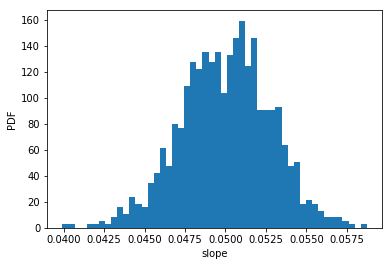

In [62]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(
                    illiteracy, fertility, size=1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

In [63]:
# Plotting bootstrap regressions
# 
# A nice way to visualize the variability we might expect in a linear regression is to plot 
# the line you would get from each bootstrap replicate of the slope and intercept. 
# Do this for the first 100 of your bootstrap replicates of the slope and intercept 
# (stored as bs_slope_reps and bs_intercept_reps).
# 
# Instructions
# 
# Generate an array of \(x\)-values consisting of 0 and 100 for the plot of the regression lines. 
# Use the np.array() function for this.
# 
# Write a for loop in which you plot a regression line with a slope and intercept given 
# by the pairs bootstrap replicates. Do this for 100 lines.
# 
# When plotting the regression lines in each iteration of the for loop,
# recall the regression equation y = a*x + b. Here, a is bs_slope_reps[i] and b is bs_intercept_reps[i].
# 
# Specify the keyword arguments linewidth=0.5, alpha=0.2, and color='red' in your call to plt.plot().
# 
# Make a scatter plot with illiteracy on the x-axis and fertility on the y-axis. 
# Remember to specify the marker='.' and linestyle='none' keyword arguments.
# 
# Label the axes, set a 2% margin, and show the plot.
# This has been done for you, so hit 'Submit Answer' to visualize the bootstrap regressions!

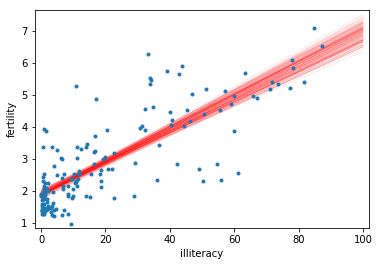

In [64]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i] * x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

# 3. Introduction to hypothesis testing

You now know how to define and estimate parameters given a model. But the question remains: how reasonable is it to observe your data if a model is true? This question is addressed by hypothesis tests. They are the icing on the inference cake. After completing this chapter, you will be able to carefully construct and test hypotheses using hacker statistics.

In [65]:
# Generating a permutation sample
# 
# In the video, you learned that permutation sampling is a great way to simulate the hypothesis 
# that two variables have identical probability distributions. 
# This is often a hypothesis you want to test, so in this exercise, 
# you will write a function to generate a permutation sample from two data sets.
# 
# Remember, a permutation sample of two arrays having respectively n1 and n2 entries is constructed by 
# concatenating the arrays together, scrambling the contents of the concatenated array,
# and then taking the first n1 entries as the permutation sample of the first array and the last n2 entries as 
# the permutation sample of the second array.
# 
# Instructions
# 
# Concatenate the two input arrays into one using np.concatenate(). 
# Be sure to pass in data1 and data2 as one argument (data1, data2).
# 
# Use np.random.permutation() to permute the concatenated array.
# 
# Store the first len(data1) entries of permuted_data as perm_sample_1 and the last len(data2) entries 
# of permuted_data as perm_sample_2. In practice, this can be achieved by using :
# len(data1) and len(data1): to slice permuted_data.
# 
# Return perm_sample_1 and perm_sample_2.

In [66]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [67]:
# Visualizing permutation sampling
# 
# To help see how permutation sampling works, 
# in this exercise you will generate permutation samples and look at them graphically.
# 
# We will use the Sheffield Weather Station data again, this time considering the monthly rainfall in June 
# (a dry month) and November (a wet month). We expect these might be differently distributed, 
# so we will take permutation samples to see how their ECDFs would look if they were identically distributed.
# 
# The data are stored in the Numpy arrays rain_june and rain_november.
# 
# As a reminder, permutation_sample() has a function signature of permutation_sample(data_1, data_2) 
# with a return value of permuted_data[:len(data_1)], permuted_data[len(data_1):], 
# where permuted_data = np.random.permutation(np.concatenate((data_1, data_2))).
# 
# Instructions
# 
# Write a for loop to generate 50 permutation samples, compute their ECDFs, and plot them.
# Generate a permutation sample pair from rain_june and rain_november using your permutation_sample() function.
# 
# Generate the x and y values for an ECDF for each of the two permutation samples 
# for the ECDF using your ecdf() function.
# 
# Plot the ECDF of the first permutation sample (x_1 and y_1) as dots. 
# Do the same for the second permutation sample (x_2 and y_2).
# 
# Generate x and y values for ECDFs for the rain_june and rain_november data and plot the ECDFs 
# using respectively the keyword arguments color='red' and color='blue'.
# 
# Label your axes, set a 2% margin, and show your plot. This has been done for you, 
# so just hit 'Submit Answer' to view the plot!

In [74]:
url = "https://assets.datacamp.com/production/repositories/470/datasets/129cba08c45749a82701fbe02180c5b69eb9adaf/sheffield_weather_station.csv"
df = pd.read_fwf(url, skiprows=8)
df.head()

,yyyy,mm,tmax,tmin,af,rain,sun
0,1883,1,6.3,1.7,6,122.1,---
1,1883,2,8.0,2.8,2,69.8,---
2,1883,3,4.8,-1.6,23,29.6,---
3,1883,4,12.2,3.8,2,74.0,---
4,1883,5,14.7,6.2,0,31.2,---


In [75]:
rain_july, rain_november = df[df['mm']==7]['rain'], df[df['mm']==11]['rain']
def ecdf(data):
    return np.sort(data), np.arange(1, len(data)+1)/float(len(data))

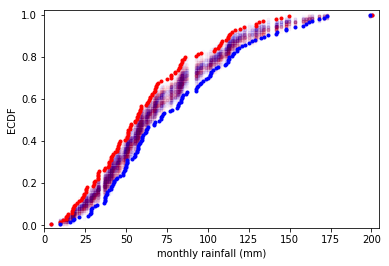

In [76]:
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(
                                    rain_july, rain_november)

    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_july)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

In [77]:
# Generating permutation replicates
# 
# As discussed in the video, a permutation replicate is a single value of 
# a statistic computed from a permutation sample. 
# As the draw_bs_reps() function you wrote in chapter 2 is useful for you to generate bootstrap replicates,
# it is useful to have a similar function, draw_perm_reps(), to generate permutation replicates. 
# You will write this useful function in this exercise.
# 
# The function has call signature draw_perm_reps(data_1, data_2, func, size=1). Importantly, 
# func must be a function that takes two arrays as arguments. 
# In most circumstances, func will be a function you write yourself.
# 
# Instructions
# 
# Define a function with this signature: draw_perm_reps(data_1, data_2, func, size=1).
# Initialize an array to hold the permutation replicates using np.empty().
# Write a for loop to:
# Compute a permutation sample using your permutation_sample() function
# Pass the samples into func() to compute the replicate and store the result in your array of replicates.
# Return the array of replicates.

In [78]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [79]:
# Look before you leap: EDA before hypothesis testing
# 
# Kleinteich and Gorb (Sci. Rep., 4, 5225, 2014) performed an interesting experiment with South American horned frogs. 
# They held a plate connected to a force transducer, along with a bait fly, in front of them. 
# They then measured the impact force and adhesive force of the frog's tongue when it struck the target.
# 
# Frog A is an adult and Frog B is a juvenile. 
# The researchers measured the impact force of 20 strikes for each frog. 
# In the next exercise, we will test the hypothesis that the two frogs have the same distribution of impact forces. 
# But, remember, it is important to do EDA first! Let's make a bee swarm plot for the data. 
# They are stored in a Pandas data frame, df, where column ID is the identity of the frog 
# and column impact_force is the impact force in Newtons (N).
# 
# Instructions
# 
# Use sns.swarmplot() to make a bee swarm plot of the data by specifying the x, y, and data keyword arguments.
# Label your axes.
# Show the plot.

In [92]:
url = "https://assets.datacamp.com/production/repositories/470/datasets/df6e0479c0f292ce9d2b951385f64df8e2a8e6ac/frog_tongue.csv"
df = pd.read_csv(url, skiprows=14)
df.rename(columns={'impact force (mN)':'impact_force'},inplace=True)
import seaborn as sns
df.columns

Index(['date', 'ID', 'trial number', 'impact_force', 'impact time (ms)',
       'impact force / body weight', 'adhesive force (mN)',
       'time frog pulls on target (ms)', 'adhesive force / body weight',
       'adhesive impulse (N-s)', 'total contact area (mm2)',
       'contact area without mucus (mm2)',
       'contact area with mucus / contact area without mucus',
       'contact pressure (Pa)', 'adhesive strength (Pa)'],
      dtype='object')

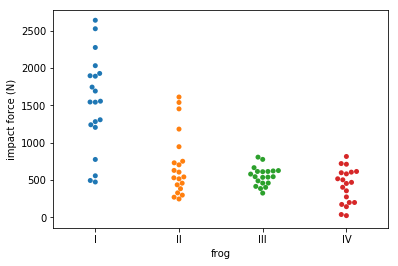

In [89]:
# Make bee swarm plot
_ = sns.swarmplot(x='ID', y='impact_force', data=df)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.show()

In [90]:
# Permutation test on frog data
# 
# The average strike force of Frog A was 0.71 Newtons (N), 
# and that of Frog B was 0.42 N for a difference of 0.29 N. 
# It is possible the frogs strike with the same force and this observed difference was by chance. 
# You will compute the probability of getting at least a 0.29 N difference in mean strike force under 
# the hypothesis that the distributions of strike forces for the two frogs are identical. 
# We use a permutation test with a test statistic of the difference of means to test this hypothesis.
# 
# For your convenience, the data has been stored in the arrays force_a and force_b.
# 
# Instructions
# 
# Define a function with call signature diff_of_means(data_1, data_2) that returns the differences 
# in means between two data sets, mean of data_1 minus mean of data_2.
# 
# Use this function to compute the empirical difference of means that was observed in the frogs.
# 
# Draw 10,000 permutation replicates of the difference of means.
# Compute the p-value.
# Print the p-value.

In [93]:
df['ID'].unique()

array(['I', 'II', 'III', 'IV'], dtype=object)

In [96]:
force_a, force_b = df[df['ID']=='II']['impact_force'], df[df['ID']=='III']['impact_force']

In [102]:
print (force_a.shape, force_b.shape)

print(force_a.mean(), force_b.mean())

(20,) (20,)
707.35 550.1


In [97]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0666


In [103]:
# A one-sample bootstrap hypothesis test
# 
# Another juvenile frog was studied, Frog C, and you want to see if Frog B and Frog C have similar impact forces. 
# Unfortunately, you do not have Frog C's impact forces available, but you know they have a mean of 0.55 N. 
# Because you don't have the original data, you cannot do a permutation test, 
# and you cannot assess the hypothesis that the forces from Frog B and Frog C come from the same distribution.
# You will therefore test another, less restrictive hypothesis: The mean strike force of Frog B is equal to that of Frog C.
# 
# To set up the bootstrap hypothesis test, you will take the mean as our test statistic. 
# Remember, your goal is to calculate the probability of getting a mean impact force less than or equal 
# to what was observed for Frog B if the hypothesis that the true mean of 
# Frog B's impact forces is equal to that of Frog C is true. You first translate all of the data of 
# Frog B such that the mean is 0.55 N. This involves adding the mean force of Frog C and subtracting 
# the mean force of Frog B from each measurement of Frog B. This leaves other properties of Frog B's distribution, 
# such as the variance, unchanged.
# 
# Instructions
# 
# Translate the impact forces of Frog B such that its mean is 0.55 N.
# Use your draw_bs_reps() function to take 10,000 bootstrap replicates of the mean of your translated forces.
# Compute the p-value by finding the fraction of your bootstrap replicates that are less than 
# the observed mean impact force of Frog B. Note that the variable of interest here is force_b.
# Print your p-value.

In [105]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [106]:
np.mean(force_b)

550.1

In [104]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b - np.mean(force_b) + 0.55

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)

p =  1.0


In [107]:
# A two-sample bootstrap hypothesis test for difference of means
# 
# We now want to test the hypothesis that Frog A and Frog B have the same mean impact force, 
# but not necessarily the same distribution, which is also impossible with a permutation test.
# 
# To do the two-sample bootstrap test, we shift both arrays to have the same mean, 
# since we are simulating the hypothesis that their means are, in fact, equal. 
# We then draw bootstrap samples out of the shifted arrays and compute the difference in means. 
# This constitutes a bootstrap replicate, and we generate many of them. 
# The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.
# 
# The objects forces_concat and empirical_diff_means are already in your namespace.
# 
# Instructions
# 
# Compute the mean of all forces (from forces_concat) using np.mean().
# 
# Generate shifted data sets for both force_a and force_b such that the mean of each is the mean of 
# the concatenated array of impact forces.
# 
# Generate 10,000 bootstrap replicates of the mean each for the two shifted arrays.
# 
# Compute the bootstrap replicates of the difference of means by subtracting the replicates of 
# the shifted impact force of Frog B from those of Frog A.
# 
# Compute and print the p-value from your bootstrap replicates.

In [109]:
# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Concatenate forces: forces_concat
forces_concat = np.concatenate((force_a, force_b))

# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(10000)

for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(forces_concat, size=len(forces_concat))

    # Compute replicate
    bs_replicates[i] = diff_of_means(bs_sample[:len(force_a)],
                                     bs_sample[len(force_a):])

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / float(len(bs_replicates))
print('p-value =', p)

p-value = 0.0562


In [110]:
# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, size=10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)

p-value = 0.0603


# 4. Hypothesis test examples

As you saw from the last chapter, hypothesis testing can be a bit tricky. You need to define the null hypothesis, figure out how to simulate it, and define clearly what it means to be "more extreme" in order to compute the p-value. Like any skill, practice makes perfect, and this chapter gives you some good practice with hypothesis tests.

In [113]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [114]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [112]:
# The vote for the Civil Rights Act in 1964
# 
# The Civil Rights Act of 1964 was one of the most important pieces of legislation ever passed in the USA. 
# Excluding "present" and "abstain" votes, 153 House Democrats and 136 Republicans voted yea. 
# However, 91 Democrats and 35 Republicans voted nay. Did party affiliation make a difference in the vote?
# 
# To answer this question, you will evaluate the hypothesis that the party of a House member 
# has no bearing on his or her vote. You will use the fraction of Democrats voting in favor as 
# your test statistic and evaluate the probability of observing a fraction of Democrats voting in favor 
# at least as small as the observed fraction of 153/244. (That's right, at least as small as. In 1964, 
# it was the Democrats who were less progressive on civil rights issues.) To do this, 
# permute the party labels of the House voters and then arbitrarily divide them 
# into "Democrats" and "Republicans" and compute the fraction of Democrats voting yea.
# 
# Instructions
# 
# Construct Boolean arrays, dems and reps that contain the votes of the respective parties; e.g.,
# dems has 153 True entries and 91 False entries.
# Write a function, frac_yea_dems(dems, reps) that returns the fraction of Democrats that voted yea. 
# The first input is an array of Booleans, Two inputs are required to use your draw_perm_reps() function, 
# but the second is not used.
# Use your draw_perm_reps() function to draw 10,000 permutation replicates of the fraction of Democrat yea votes.
# Compute and print the p-value.

In [115]:
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(dems) / len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, size=10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0002


In [116]:
# A time-on-website analog
# 
# It turns out that you already did a hypothesis test analogous to an A/B test 
# where you are interested in how much time is spent on the website before and after an ad campaign. 
# The frog tongue force (a continuous quantity like time on the website) is an analog. 
# "Before" = Frog A and "after" = Frog B. Let's practice this again with something that actually is a before/after scenario.
# 
# We return to the no-hitter data set. In 1920, Major League Baseball implemented important rule changes
# that ended the so-called dead ball era. Importantly, the pitcher was no longer allowed to spit on or scuff the ball, 
# an activity that greatly favors pitchers. In this problem you will perform an A/B test to determine 
# if these rule changes resulted in a slower rate of no-hitters (i.e., longer average time between no-hitters) 
# using the difference in mean inter-no-hitter time as your test statistic. The inter-no-hitter times for 
# the respective eras are stored in the arrays nht_dead and nht_live, where "nht" is meant to stand for "no-hitter time."
# 
# Since you will be using your draw_perm_reps() function in this exercise, it may be useful 
# to remind yourself of its call signature: draw_perm_reps(d1, d2, func, size=1) or even referring 
#     back to the chapter 3 exercise in which you defined it.
# 
# Instructions
# 
# Compute the observed difference in mean inter-nohitter time using diff_of_means().
# Generate 10,000 permutation replicates of the difference of means using draw_perm_reps().
# Compute and print the p-value.

In [117]:
nht_dead = [  -1,  894,   10,  130,    1,  934,   29,    6,  485,  254,  372,
         81,  191,  355,  180,  286,   47,  269,  361,  173,  246,  492,
        462, 1319,   58,  297,   31, 2970,  640,  237,  434,  570,   77,
        271,  563, 3365,   89,    0,  379,  221,  479,  367,  628,  843,
       1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,  715,
        966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,  104,
       1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,  166,
         96,  702,   23,  524,   26,  299,   59,   39,   12,    2,  308,
       1114,  813,  887]

nht_live = [ 645, 2088,   42, 2090,   11,  886, 1665, 1084, 2900, 2432,  750,
       4021, 1070, 1765, 1322,   26,  548, 1525,   77, 2181, 2752,  127,
       2147,  211,   41, 1575,  151,  479,  697,  557, 2267,  542,  392,
         73,  603,  233,  255,  528,  397, 1529, 1023, 1194,  462,  583,
         37,  943,  996,  480, 1497,  717,  224,  219, 1531,  498,   44,
        288,  267,  600,   52,  269, 1086,  386,  176, 2199,  216,   54,
        675, 1243,  463,  650,  171,  327,  110,  774,  509,    8,  197,
        136,   12, 1124,   64,  380,  811,  232,  192,  731,  715,  226,
        605,  539, 1491,  323,  240,  179,  702,  156,   82, 1397,  354,
        778,  603, 1001,  385,  986,  203,  149,  576,  445,  180, 1403,
        252,  675, 1351, 2983, 1568,   45,  899, 3260, 1025,   31,  100,
       2055, 4043,   79,  238, 3931, 2351,  595,  110,  215,    0,  563,
        206,  660,  242,  577,  179,  157,  192,  192, 1848,  792, 1693,
         55,  388,  225, 1134, 1172, 1555,   31, 1582, 1044,  378, 1687,
       2915,  280,  765, 2819,  511, 1521,  745, 2491,  580, 2072, 6450,
        578,  745, 1075, 1103, 1549, 1520,  138, 1202,  296,  277,  351,
        391,  950,  459,   62, 1056, 1128,  139,  420,   87,   71,  814,
        603, 1349,  162, 1027,  783,  326,  101,  876,  381,  905,  156,
        419,  239,  119,  129,  467]

In [118]:
# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
nht_diff_obs = diff_of_means(nht_dead, nht_live)

# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates = draw_perm_reps(nht_dead, nht_live,
                                 diff_of_means, size=10000)

# Compute and print the p-value: p
p = np.sum(perm_replicates <= nht_diff_obs) / len(perm_replicates)
print('p-val =',p)

p-val = 0.0001


In [119]:
# Hypothesis test on Pearson correlation
# 
# The observed correlation between female illiteracy and fertility may just be by chance; 
# the fertility of a given country may actually be totally independent of its illiteracy. 
# You will test this hypothesis. To do so, permute the illiteracy values but leave the fertility values fixed. 
# This simulates the hypothesis that they are totally independent of each other. 
# For each permutation, compute the Pearson correlation coefficient and assess 
# how many of your permutation replicates have a Pearson correlation coefficient greater than the observed one.
# 
# The function pearson_r() that you wrote in the prequel to this course for computing 
# the Pearson correlation coefficient is already in your name space.
# 
# Instructions
# 
# Compute the observed Pearson correlation between illiteracy and fertility.
# Initialize an array to store your permutation replicates.
# Write a for loop to draw 10,000 replicates:
# Permute the illiteracy measurements using np.random.permutation().
# Compute the Pearson correlation between the permuted illiteracy array, illiteracy_permuted, and fertility.
# Compute and print the p-value from the replicates.

In [121]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [122]:
# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy, fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


In [123]:
# Do neonicotinoid insecticides have unintended consequences?
# 
# As a final exercise in hypothesis testing before we put everything together in our case study in the next chapter, 
# you will investigate the effects of neonicotinoid insecticides on bee reproduction. 
# These insecticides are very widely used in the United States to combat aphids and other pests that damage plants.
# 
# In a recent study, Straub, et al. (Proc. Roy. Soc. B, 2016) investigated the effects of neonicotinoids on 
# the sperm of pollinating bees. In this and the next exercise, you will study how the pesticide treatment affected 
# the count of live sperm per half milliliter of semen.
# 
# First, we will do EDA, as usual. Plot ECDFs of the alive sperm count for untreated bees 
# (stored in the Numpy array control) and bees treated with pesticide (stored in the Numpy array treated).
# 
# Instructions
# 
# Use your ecdf() function to generate x,y values from the control and treated arrays for plotting the ECDFs.
# Plot the ECDFs on the same plot.
# The margins have been set for you, along with the legend and axis labels. Hit 'Submit Answer' to see the result!

In [124]:
url = "https://assets.datacamp.com/production/repositories/470/datasets/e427679d28d154934a6c087b2fa945bc7696db6d/bee_sperm.csv"
df = pd.read_csv(url, skiprows=3)
df.head()

,Specimen,Treatment,Environment,TreatmentNCSS,Sample ID,Colony,Cage,Sample,Sperm Volume per 500 ul,Quantity,ViabilityRaw (%),Quality,Age (d),Infertil,AliveSperm,Quantity Millions,Alive Sperm Millions,Dead Sperm Millions
0,227,Control,Cage,1,C2-1-1,2,1,1,2150000,2150000,96.7263814616756,96.726381,14,0,2079617,2.1500,2.079617,0.070383
1,228,Control,Cage,1,C2-1-2,2,1,2,2287500,2287500,96.3498079760595,96.349808,14,0,2204001,2.2875,2.204001,0.083499
2,229,Control,Cage,1,C2-1-3,2,1,3,87500,87500,98.75,98.750000,14,0,86406,0.0875,0.086406,0.001094
3,230,Control,Cage,1,C2-1-4,2,1,4,1875000,1875000,93.2874208336941,93.287421,14,0,1749139,1.8750,1.749139,0.125861
4,231,Control,Cage,1,C2-1-5,2,1,5,1587500,1587500,97.7925061050061,97.792506,14,0,1552456,1.5875,1.552456,0.035044


In [125]:
df['Treatment'].unique()

array(['Control', 'Pesticide'], dtype=object)

In [126]:
control, treated = df[df['Treatment']=='Control']['AliveSperm'], df[df['Treatment']=='Pesticide']['AliveSperm']
control.shape, treated.shape

((145,), (90,))

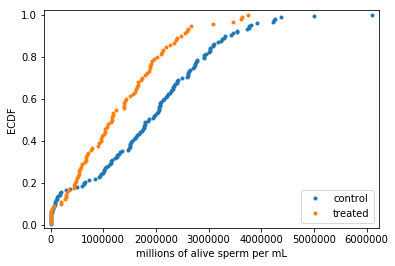

In [127]:
# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()

In [128]:
# Bootstrap hypothesis test on bee sperm counts
# 
# Now, you will test the following hypothesis: On average, male bees treated with neonicotinoid insecticide have 
# the same number of active sperm per milliliter of semen than do untreated male bees. 
# You will use the difference of means as your test statistic.
# 
# For your reference, the call signature for the draw_bs_reps() function you wrote in chapter 2 is 
# draw_bs_reps(data, func, size=1).
# 
# Instructions
# 
# Compute the mean alive sperm count of control minus that of treated.
# Compute the mean of all alive sperm counts. To do this, first concatenate control and treated and take 
# the mean of the concatenated array.
# 
# Generate shifted data sets for both control and treated such that the shifted data sets have the same mean. 
# This has already been done for you.
# 
# Generate 10,000 bootstrap replicates of the mean each for the two shifted arrays. Use your draw_bs_reps() function.
# Compute the bootstrap replicates of the difference of means.
# The code to compute and print the p-value has been written for you. Hit 'Submit Answer' to see the result!

In [129]:
# Compute the difference in mean sperm count: diff_means
diff_means = np.mean(control) - np.mean(treated)

# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate((control, treated)))

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted,
                               np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted,
                               np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control - bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) \
            / len(bs_replicates)
print('p-value =', p)

p-value = 0.0


# 5. Putting it all together: a case study

Every year for the past 40-plus years, Peter and Rosemary Grant have gone to the Galápagos island of Daphne Major and collected data on Darwin's finches. Using your skills in statistical inference, you will spend this chapter with their data, and witness first hand, through data, evolution in action. It's an exhilarating way to end the course!

In [153]:
url1 = "https://assets.datacamp.com/production/repositories/470/datasets/eb228490f7d823bfa6458b93db075ca5ccd3ec3d/finch_beaks_1975.csv"
url2 = "https://assets.datacamp.com/production/repositories/470/datasets/b28d5bf65e38460dca7b3c5c0e4d53bdfc1eb905/finch_beaks_2012.csv"

df1 = pd.read_csv(url1)
df2 = pd.read_csv(url1)

In [154]:
names = ['band','species','beak_length','beak_depth']
df1.columns=names
df2.columns=names
df1['year']=1975
df2['year']=2012

In [155]:
df=pd.concat([df1, df2])
df.head()

,band,species,beak_length,beak_depth,year
0,2,fortis,9.4,8.0,1975
1,9,fortis,9.2,8.3,1975
2,12,fortis,9.5,7.5,1975
3,15,fortis,9.5,8.0,1975
4,305,fortis,11.5,9.9,1975


In [156]:
# EDA of beak depths of Darwin's finches
# 
# For your first foray into the Darwin finch data, you will study how the beak depth 
# (the distance, top to bottom, of a closed beak) of the finch species Geospiza scandens has changed over time. 
# The Grants have noticed some changes of beak geometry depending on the types of seeds available on the island, 
# and they also noticed that there was some interbreeding with another major species on Daphne Major, 
# Geospiza fortis. These effects can lead to changes in the species over time.
# 
# In the next few problems, you will look at the beak depth of G. scandens on Daphne Major in 1975 and in 2012. 
# To start with, let's plot all of the beak depth measurements in 1975 and 2012 in a bee swarm plot.
# 
# The data are stored in a pandas DataFrame called df with columns 'year' and 'beak_depth'. 
# The units of beak depth are millimeters (mm).
# 
# Instructions
# 
# Create the beeswarm plot.
# Label the axes.
# Show the plot.

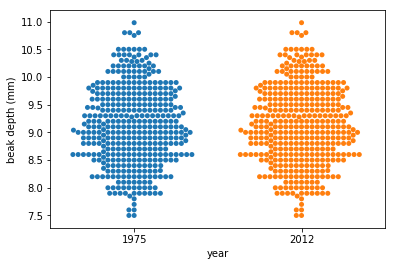

In [157]:
# Create bee swarm plot
_ = sns.swarmplot(data=df, x='year', y='beak_depth')

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

# Show the plot
plt.show()

In [158]:
def ecdf(data):
    y=np.arange(1, len(data)+1)/float(len(data))
    x=np.sort(data)
    return x,y

In [159]:
# ECDFs of beak depths
# 
# While bee swarm plots are useful, we found that ECDFs are often even better when doing EDA. 
# Plot the ECDFs for the 1975 and 2012 beak depth measurements on the same plot.
# 
# For your convenience, the beak depths for the respective years has been stored in the NumPy arrays bd_1975 and bd_2012.
# 
# Instructions
# 
# Compute the ECDF for the 1975 and 2012 data.
# Plot the two ECDFs.
# Set a 2% margin and add axis labels and a legend to the plot.
# Hit 'Submit Answer' to view the plot!

In [160]:
bd_1975 = df1['beak_depth'].values
bd_2012 = df2['beak_depth'].values

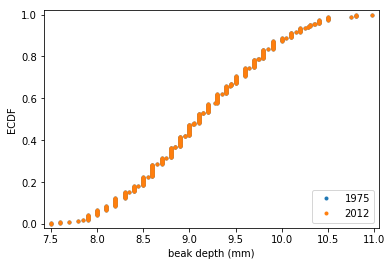

In [161]:
# Compute ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

In [143]:
# Parameter estimates of beak depths
# 
# Estimate the difference of the mean beak depth of the G. scandens samples from 1975 and 2012 and 
# report a 95% confidence interval.
# 
# Since in this exercise you will use the draw_bs_reps() function you wrote in chapter 2, 
# it may be helpful to refer back to it.
# 
# Instructions
# 
# Compute the difference of the sample means.
# Take 10,000 bootstrap replicates of the mean for the 1975 beak depths using your draw_bs_reps() function. 
# Also get 10,000 bootstrap replicates of the mean for the 2012 beak depths.
# Subtract the 1975 replicates from the 2012 replicates to get bootstrap replicates of the difference of means.
# Use the replicates to compute the 95% confidence interval.
# Hit 'Submit Answer' to view the results!

In [162]:
# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(bd_2012) - np.mean(bd_1975)

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012, np.mean, 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.0 mm
95% confidence interval = [-0.09938089  0.09794231] mm


In [146]:
# Hypothesis test: Are beaks deeper in 2012?
#     
# Your plot of the ECDF and determination of the confidence interval make it pretty clear that 
# the beaks of G. scandens on Daphne Major have gotten deeper. But is it possible that this effect is just
# due to random chance? In other words, what is the probability that we would get the observed difference in mean 
# beak depth if the means were the same?
# 
# Be careful! The hypothesis we are testing is not that the beak depths come from the same distribution. 
# For that we could use a permutation test. The hypothesis is that the means are equal. 
# To perform this hypothesis test, we need to shift the two data sets so that they have 
# the same mean and then use bootstrap sampling to compute the difference of means.
# 
# Instructions
# 
# Make a concatenated array of the 1975 and 2012 beak depths and compute and store its mean.
# Shift bd_1975 and bd_2012 such that their means are equal to the one you just computed for the combined data set.
# Take 10,000 bootstrap replicates of the mean each for the 1975 and 2012 beak depths.
# Subtract the 1975 replicates from the 2012 replicates to get bootstrap replicates of the difference.
# Compute and print the p-value. The observed difference in means you computed in the 
# last exercise is still in your namespace as mean_diff.

In [165]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the samples
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, 10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value: p
p = np.sum(bs_diff_replicates >= mean_diff) / float(len(bs_diff_replicates))

# Print p-value
print('p =', p)

p = 0.5012


In [166]:
# EDA of beak length and depth
# 
# The beak length data are stored as bl_1975 and bl_2012, again with units of millimeters (mm). 
# You still have the beak depth data stored in bd_1975 and bd_2012. Make scatter plots of beak 
# depth (y-axis) versus beak length (x-axis) for the 1975 and 2012 specimens.
# 
# Instructions
# 
# Make a scatter plot of the 1975 data. Use the color='blue' keyword argument. Also use an alpha=0.5 keyword 
# argument to have transparency in case data points overlap.
# Do the same for the 2012 data, but use the color='red' keyword argument.
# Add a legend and label the axes.

In [169]:
bl_1975=df[df['year']==1975]['beak_length'].values
bd_1975=df[df['year']==1975]['beak_depth'].values
bl_2012=df[df['year']==2012]['beak_length'].values
bd_2012=df[df['year']==2012]['beak_depth'].values

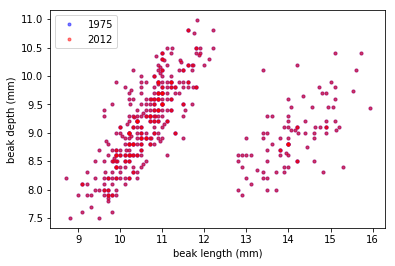

In [170]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

In [171]:
# Linear regressions
# 
# Perform a linear regression for both the 1975 and 2012 data. 
# Then, perform pairs bootstrap estimates for the regression parameters. 
# Report 95% confidence intervals on the slope and intercept of the regression line.
# 
# You will use the draw_bs_pairs_linreg() function you wrote back in chapter 2.
# 
# As a reminder, its call signature is draw_bs_pairs_linreg(x, y, size=1), and 
# it returns bs_slope_reps and bs_intercept_reps. The beak length data are stored as bl_1975 and bl_2012,
# and the beak depth data is stored in bd_1975 and bd_2012.
# 
# Instructions
# 
# Compute the slope and intercept for both the 1975 and 2012 data sets.
# Obtain 1000 pairs bootstrap samples for the linear regressions using your draw_bs_pairs_linreg() function.
# Compute 95% confidence intervals for the slopes and the intercepts.

In [172]:
# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975, 1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012, 1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = \
        draw_bs_pairs_linreg(bl_1975, bd_1975, 1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = \
        draw_bs_pairs_linreg(bl_2012, bd_2012, 1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])
intercept_conf_int_1975 = np.percentile(
                            bs_intercept_reps_1975, [2.5, 97.5])
intercept_conf_int_2012 = np.percentile(
                            bs_intercept_reps_2012, [2.5, 97.5])

# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

1975: slope = 0.0945968320892116 conf int = [0.05681557 0.13763161]
1975: intercept = 8.053907980716424 conf int = [7.5749563 8.4720973]
2012: slope = 0.0945968320892116 conf int = [0.04981624 0.13563496]
2012: intercept = 8.053907980716424 conf int = [7.58593107 8.57875696]


In [173]:
# Displaying the linear regression results
# 
# Now, you will display your linear regression results on the scatter plot, 
# the code for which is already pre-written for you from your previous exercise. 
# To do this, take the first 100 bootstrap samples (stored in bs_slope_reps_1975, 
# bs_intercept_reps_1975, bs_slope_reps_2012, and bs_intercept_reps_2012) and plot 
# the lines with alpha=0.2 and linewidth=0.5 keyword arguments to plt.plot().
# 
# Instructions
# 
# Generate the x-values for the bootstrap lines using np.array(). They should consist of 10 mm and 17 mm.
# Write a for loop to plot 100 of the bootstrap lines for the 1975 and 2012 data sets. 
# The lines for the 1975 data set should be 'blue' and those for the 2012 data set should be 'red'.
# Hit 'Submit Answer' to view the plot!

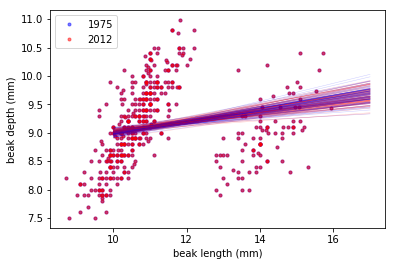

In [174]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([10, 17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i] * x + bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, bs_slope_reps_2012[i] * x + bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color='red')

# Draw the plot again
plt.show()

In [175]:
# Beak length to depth ratio
# 
# The linear regressions showed interesting information about the beak geometry. 
# The slope was the same in 1975 and 2012, suggesting that for every millimeter gained in beak length, 
# the birds gained about half a millimeter in depth in both years. However, 
# if we are interested in the shape of the beak, we want to compare the ratio of beak length to beak depth. 
# Let's make that comparison.
# 
# Remember, the data are stored in bd_1975, bd_2012, bl_1975, and bl_2012.
# 
# Instructions
# 
# Make arrays of the beak length to depth ratio of each bird for 1975 and for 2012.
# Compute the mean of the length to depth ratio for 1975 and for 2012.
# Generate 10,000 bootstrap replicates each for the mean ratio for 1975 and 2012 using your draw_bs_reps() function.
# Get a 99% bootstrap confidence interval for the length to depth ratio for 1975 and 2012.
# Print the results.

In [176]:
# Compute length-to-depth ratios
ratio_1975 = bl_1975 / bd_1975
ratio_2012 = bl_2012 / bd_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, size=10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5, 99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)

1975: mean ratio = 1.2461609991094327 conf int = [1.2235186  1.27046862]
2012: mean ratio = 1.2461609991094327 conf int = [1.22302501 1.27017018]


In [177]:
# EDA of heritability
# 
# The array bd_parent_scandens contains the average beak depth (in mm) of two parents of 
# the species G. scandens. The array bd_offspring_scandens contains the average beak depth of 
# the offspring of the respective parents. The arrays bd_parent_fortis and bd_offspring_fortis 
# contain the same information about measurements from G. fortis birds.
# 
# Make a scatter plot of the average offspring beak depth (y-axis) versus average parental 
# beak depth (x-axis) for both species. Use the alpha=0.5 keyword argument to help you see overlapping points.
# 
# Instructions
# 
# Generate scatter plots for both species. Display the data for G. fortis in blue and G. scandens in red.
# Set the axis labels, make a legend, and show the plot.

In [179]:
url3 = "https://assets.datacamp.com/production/repositories/470/datasets/532cb2fecd1bffb006c79a28f344af2290d643f3/fortis_beak_depth_heredity.csv"
url4 = "https://assets.datacamp.com/production/repositories/470/datasets/7ff772e1f4e99ed93685296063b6e604a334236d/scandens_beak_depth_heredity.csv"
df3=pd.read_csv(url3)
df4=pd.read_csv(url4)

In [180]:
bd_parent_fortis = (df3['Male BD'].values + df3['Female BD'].values)/2
bd_offspring_fortis = df3['Mid-offspr'].values
bd_parent_scandens = df4['mid_parent'].values
bd_offspring_scandens = df4['mid_offspring'].values

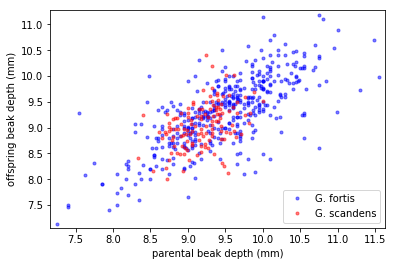

In [181]:
# Make scatter plots
_ = plt.plot(bd_parent_fortis, bd_offspring_fortis,
             marker='.', linestyle='none', color='blue', alpha=0.5)
_ = plt.plot(bd_parent_scandens, bd_offspring_scandens,
             marker='.', linestyle='none', color='red', alpha=0.5)

# Set margins, make legend, label axes, and show plot
plt.margins(0.02)

# Label axes
_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')

# Add legend
_ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')

# Show plot
plt.show()

In [182]:
# Correlation of offspring and parental data
# 
# In an effort to quantify the correlation between offspring and parent beak depths, 
# we would like to compute statistics, such as the Pearson correlation coefficient, 
# between parents and offspring. To get confidence intervals on this, we need to do a pairs bootstrap.
# 
# You have already written a function to do pairs bootstrap to get estimates 
# for parameters derived from linear regression. 
# Your task in this exercise is to make a new function with call signature draw_bs_pairs(x, y, func, size=1) 
# that performs pairs bootstrap and computes a single statistic on pairs samples defined. 
# The statistic of interest is computed by calling func(bs_x, bs_y). In the next exercise, you will use pearson_r for func.
# 
# Instructions
# 
# Set up an array of indices to sample from. (Remember, when doing pairs bootstrap, 
# we randomly choose indices and use those to get the pairs.)
# Initialize the array of bootstrap replicates. This should be a one-dimensional array of length size.
# Write a for loop to draw the samples.
# Randomly choose indices from the array of indices you previously set up.
# Extract x values and y values from the input array using the indices you just chose to generate a bootstrap sample.
# Use func to compute the statistic of interest from the bootstrap samples 
# of x and y and store it in your array of bootstrap replicates.
# Return the array of bootstrap replicates.

In [183]:
def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for single statistic."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)

    return bs_replicates

In [184]:
# Pearson correlation of offspring and parental data
# 
# The Pearson correlation coefficient seems like a useful measure of how strongly 
# the beak depth of parents are inherited by their offspring. 
# Compute the Pearson correlation coefficient between parental and offspring beak depths for G. scandens.
# Do the same for G. fortis. Then, use the function you wrote in the last exercise to compute a 95% 
# confidence interval using pairs bootstrap.
# 
# Remember, the data are stored in bd_parent_scandens, bd_offspring_scandens, bd_parent_fortis, and bd_offspring_fortis.
# 
# Instructions
# 
# Use the pearson_r() function you wrote in the prequel to this course to compute 
# the Pearson correlation coefficient for G. scandens and G. fortis.
# Acquire 1000 pairs bootstrap replicates of the Pearson correlation coefficient using the draw_bs_pairs() 
# function you wrote in the previous exercise for G. scandens and G. fortis.
# Compute the 95% confidence interval for both using your bootstrap replicates.

In [185]:
# Compute the Pearson correlation coefficients
r_scandens = pearson_r(bd_parent_scandens, bd_offspring_scandens)
r_fortis = pearson_r(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of Pearson r
bs_replicates_scandens = draw_bs_pairs(
        bd_parent_scandens, bd_offspring_scandens, pearson_r, size=1000)
bs_replicates_fortis = draw_bs_pairs(
        bd_parent_fortis, bd_offspring_fortis, pearson_r, size=1000)

# Compute 95% confidence intervals
conf_int_scandens = np.percentile(bs_replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', r_scandens, conf_int_scandens)
print('G. fortis:', r_fortis, conf_int_fortis)

G. scandens: 0.41170636294012586 [0.27616622 0.54375381]
G. fortis: 0.7283412395518486 [0.66569942 0.7795512 ]


In [186]:
# Measuring heritability
# 
# Remember that the Pearson correlation coefficient is the ratio of the covariance to 
# the geometric mean of the variances of the two data sets. This is a measure of the correlation 
# between parents and offspring, but might not be the best estimate of heritability. 
# If we stop and think, it makes more sense to define heritability as the ratio of 
# the covariance between parent and offspring to the variance of the parents alone. 
# In this exercise, you will estimate the heritability and perform a pairs bootstrap calculation 
# to get the 95% confidence interval.
# 
# This exercise highlights a very important point. Statistical inference (and data analysis in general) 
# is not a plug-n-chug enterprise. You need to think carefully about the questions you are seeking 
# to answer with your data and analyze them appropriately. If you are interested in how heritable traits are, 
# the quantity we defined as the heritability is more apt than the off-the-shelf statistic, 
# the Pearson correlation coefficient.
# 
# Remember, the data are stored in bd_parent_scandens, bd_offspring_scandens, bd_parent_fortis, and bd_offspring_fortis.
# 
# Instructions
# 
# Write a function heritability(parents, offspring) that computes heritability defined as the ratio of 
# the covariance of the trait in parents and offspring divided by the variance of the trait in the parents. 
# Hint: Remind yourself of the np.cov() function we covered in the prequel to this course.
# Use this function to compute the heritability for G. scandens and G. fortis.
# Acquire 1000 bootstrap replicates of the heritability using pairs bootstrap for G. scandens and G. fortis.
# Compute the 95% confidence interval for both using your bootstrap replicates.
# Print the results.

In [187]:
def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[0,1] / covariance_matrix[0,0]

# Compute the heritability
heritability_scandens = heritability(bd_parent_scandens,
                                     bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis,
                                   bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of heritability
replicates_scandens = draw_bs_pairs(
        bd_parent_scandens, bd_offspring_scandens, heritability, size=1000)
replicates_fortis = draw_bs_pairs(
        bd_parent_fortis, bd_offspring_fortis, heritability, size=1000)

# Compute 95% confidence intervals
conf_int_scandens = np.percentile(replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)

G. scandens: 0.5485340868685983 [0.35382981 0.76103345]
G. fortis: 0.7229051911438156 [0.64884276 0.79397524]


In [188]:
# Is beak depth heritable at all in G. scandens?
# 
# The heritability of beak depth in G. scandens seems low. It could be that this observed heritability 
# was just achieved by chance and beak depth is actually not really heritable in the species. 
# You will test that hypothesis here. To do this, you will do a pairs permutation test.
# 
# Instructions
# 
# Initialize your array of replicates of heritability. We will take 10,000 pairs permutation replicates.
# Write a for loop to generate your replicates.
# Permute the bd_parent_scandens array using np.random.permutation().
# Compute the heritability between the permuted array and the bd_offspring_scandens array using 
# the heritability() function you wrote in the last exercise. Store the result in the replicates array.
# 
# Compute the p-value as the number of replicates that are greater than the observed heritability_scandens 
# you computed in the last exercise.

In [189]:
# Initialize array of replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute parent beak depths
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_replicates[i] = heritability(bd_parent_permuted,
                                      bd_offspring_scandens)

# Compute p-value: p
p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)

# Print the p-value
print('p-val =', p)

p-val = 0.0


# END OF THIS EXCELLENT COURSE